<a href="https://colab.research.google.com/github/sabhinav3/Intro_to_ML/blob/main/ml_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
housing_data = pd.read_csv("/Housing.csv")

In [25]:
# Map binary columns to numeric values
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def map_binary_values(x):
    return x.map({'yes': 1, 'no': 0})

housing_data[binary_cols] = housing_data[binary_cols].apply(map_binary_values)



In [6]:
# Split the data into training and test sets
np.random.seed(0)
train_data, test_data = train_test_split(housing_data, test_size=0.2)


In [7]:
# Define loss and penalty loss functions
def calculate_loss(X_values, Y_values, theta, m):
    h = X_values.dot(theta)
    err = np.subtract(h, Y_values)
    square_err = np.square(err)
    loss_value = 1 / (2 * m) * np.sum(square_err)
    return loss_value

def calculate_penalty_loss(X_values, Y_values, theta, m, penalty):
    h = X_values.dot(theta)
    err = np.subtract(h, Y_values)
    square_err = np.square(err)
    penalty_loss_value = 1 / (2 * m) * np.sum(square_err) + (penalty / (2 * m)) * np.sum(np.square(theta[1:]))
    return penalty_loss_value


In [29]:
# Define linear regression functions
def linear_regression(X_train, Y_train, X_test, Y_test, theta, learning_rate, iterations):
    m_train = len(Y_train)
    m_test = len(Y_test)
    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)

    for i in range(iterations):
        h_train = X_train.dot(theta)
        h_test = X_test.dot(theta)

        err_train = np.subtract(h_train, Y_train)
        err_test = np.subtract(h_test, Y_test)

        xy_dtheta = (1 / m_train) * X_train.transpose().dot(err_train)
        theta = theta - learning_rate * xy_dtheta

        training_loss_hist[i] = calculate_loss(X_train, Y_train, theta, m_train)
        validation_loss_hist[i] = calculate_loss(X_test, Y_test, theta, m_test)

    return theta, training_loss_hist, validation_loss_hist


In [9]:
# Define feature scaling function
def feature_scaling(train_df, test_df, categorical_cols, scaler):
    df_train = train_df.copy()
    df_train[['price']] = scaler.fit_transform(train_df[['price']])
    df_train[categorical_cols] = scaler.fit_transform(train_df[categorical_cols])

    Y_train = df_train[['price']].to_numpy()
    m_train = len(Y_train)

    X_train = df_train[categorical_cols].to_numpy()
    X_train = np.hstack((np.ones((m_train, 1)), X_train))

    df_test = test_df.copy()
    df_test[['price']] = scaler.fit_transform(test_df[['price']])
    df_test[categorical_cols] = scaler.fit_transform(test_df[categorical_cols])

    Y_test = df_test[['price']].to_numpy()
    m_test = len(Y_test)

    X_test = df_test[categorical_cols].to_numpy()
    X_test = np.hstack((np.ones((m_test, 1)), X_test))

    return X_train, Y_train, X_test, Y_test


In [10]:
# Feature columns for different scenarios
categorical_cols_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_cols_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']


In [11]:
# Scenario 1: Linear regression with no scaling or penalty
Y_train_1 = train_data[['price']].to_numpy()
m_train_1 = len(Y_train_1)
X_train_1 = train_data[categorical_cols_1].to_numpy()
X_train_1 = np.hstack((np.ones((m_train_1, 1)), X_train_1))
Y_test_1 = test_data[['price']].to_numpy()
m_test_1 = len(Y_test_1)
X_test_1 = test_data[categorical_cols_1].to_numpy()
X_test_1 = np.hstack((np.ones((m_test_1, 1)), X_test_1))

iterations_1 = 500
alpha_1 = 0.000000001
theta_1 = np.zeros((len(categorical_cols_1) + 1, 1))
theta_1, training_loss_hist_1, validation_loss_hist_1 = linear_regression(X_train_1, Y_train_1, X_test_1, Y_test_1, theta_1, alpha_1, iterations_1)


In [12]:
# Scenario 2A: Linear regression with MinMaxScaler
X_train_2a, Y_train_2a, X_test_2a, Y_test_2a = feature_scaling(train_data, test_data, categorical_cols_1, MinMaxScaler())
iterations_2a = 2000
alpha_2a = 0.01
theta_2a = np.zeros((len(categorical_cols_1) + 1, 1))
theta_2a, training_loss_hist_2a, validation_loss_hist_2a = linear_regression(X_train_2a, Y_train_2a, X_test_2a, Y_test_2a, theta_2a, alpha_2a, iterations_2a)


In [20]:
# Scenario 2B: Linear regression with StandardScaler
X_train_2b, Y_train_2b, X_test_2b, Y_test_2b = feature_scaling(train_data, test_data, categorical_cols_2, StandardScaler())
iterations_2b = 2000
alpha_2b = 0.01
theta_2b = np.zeros((len(categorical_cols_2) + 1, 1))
theta_2b, training_loss_hist_2b, validation_loss_hist_2b = linear_regression(X_train_2b, Y_train_2b, X_test_2b, Y_test_2b, theta_2b, alpha_2b, iterations_2b)


In [22]:
# Scenario 3A: Linear regression with MinMaxScaler and L2 regularization
X_train_3a, Y_train_3a, X_test_3a, Y_test_3a = feature_scaling(train_data, test_data, categorical_cols_1, MinMaxScaler())
iterations_3a = 4000
alpha_3a = 0.01
penalty_3a = 1
theta_3a = np.zeros((len(categorical_cols_1) + 1, 1))


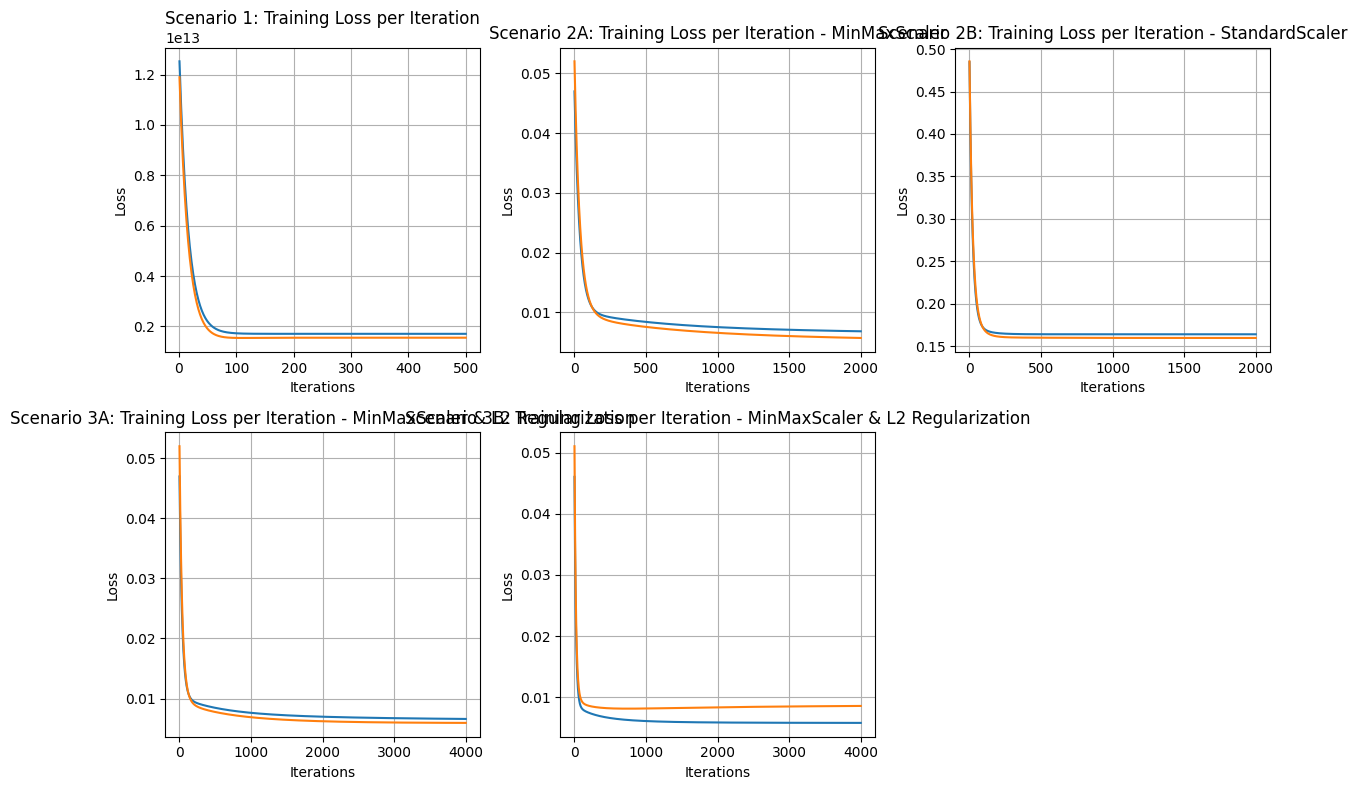

In [24]:
# Define penalty_linear_regression function
def penalty_linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, penalty, iterations):
    m_train = len(Y_train)
    m_test = len(Y_test)
    training_loss_hist = np.zeros(iterations)
    validation_loss_hist = np.zeros(iterations)

    for i in range(iterations):
        h_train = X_train.dot(theta)
        h_test = X_test.dot(theta)

        err_train = np.subtract(h_train, Y_train)
        err_test = np.subtract(h_test, Y_test)

        xy_dtheta = (1 / m_train) * X_train.transpose().dot(err_train)
        theta = theta * (1 - alpha * penalty / m_train) - alpha * xy_dtheta

        training_loss_hist[i] = calculate_penalty_loss(X_train, Y_train, theta, m_train, penalty)
        validation_loss_hist[i] = calculate_penalty_loss(X_test, Y_test, theta, m_test, penalty)

    return theta, training_loss_hist, validation_loss_hist

theta_3a, training_loss_hist_3a, validation_loss_hist_3a = penalty_linear_regression(X_train_3a, Y_train_3a, X_test_3a, Y_test_3a, theta_3a, alpha_3a, penalty_3a, iterations_3a)

# Scenario 3B: Linear regression with MinMaxScaler and L2 regularization
X_train_3b, Y_train_3b, X_test_3b, Y_test_3b = feature_scaling(train_data, test_data, categorical_cols_2, MinMaxScaler())
iterations_3b = 4000
alpha_3b = 0.01
penalty_3b = 10
theta_3b = np.zeros((len(categorical_cols_2) + 1, 1))
theta_3b, training_loss_hist_3b, validation_loss_hist_3b = penalty_linear_regression(X_train_3b, Y_train_3b, X_test_3b, Y_test_3b, theta_3b, alpha_3b, penalty_3b, iterations_3b)

# Plot training and validation loss for each scenario
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(range(1, iterations_1 + 1), training_loss_hist_1)
plt.plot(range(1, iterations_1 + 1), validation_loss_hist_1)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Scenario 1: Training Loss per Iteration')

plt.subplot(2, 3, 2)
plt.plot(range(1, iterations_2a + 1), training_loss_hist_2a)
plt.plot(range(1, iterations_2a + 1), validation_loss_hist_2a)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Scenario 2A: Training Loss per Iteration - MinMaxScaler')

plt.subplot(2, 3, 3)
plt.plot(range(1, iterations_2b + 1), training_loss_hist_2b)
plt.plot(range(1, iterations_2b + 1), validation_loss_hist_2b)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Scenario 2B: Training Loss per Iteration - StandardScaler')

plt.subplot(2, 3, 4)
plt.plot(range(1, iterations_3a + 1), training_loss_hist_3a)
plt.plot(range(1, iterations_3a + 1), validation_loss_hist_3a)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Scenario 3A: Training Loss per Iteration - MinMaxScaler & L2 Regularization')

plt.subplot(2, 3, 5)
plt.plot(range(1, iterations_3b + 1), training_loss_hist_3b)
plt.plot(range(1, iterations_3b + 1), validation_loss_hist_3b)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Scenario 3B: Training Loss per Iteration - MinMaxScaler & L2 Regularization')

plt.tight_layout()
plt.show()




